# **CP462 Project:  **

# หัวข้อ : **ภาพยนตร์ยอดนิยมที่ได้รับการจัดอันดับสูง**

**สมาชิก:**
<br>1) ภาคินณัฏฐ์ พัฒนะจิรานันท์ (ID: 65102010200)
<br>2) นรบดี  สิริวิทูร (ID : 65102010195)
<br><br>
**Dataset:** movies_metadata.csv <br>
**Source:** Kaggle

## **Import Packages**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import missingno as msno
import plotly.express as px

import warnings; warnings.simplefilter('ignore')

## **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')

## **Explore Data Analysis**

In [ ]:
df.shape

(45466, 24)

In [ ]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


## **Data Manipulate / Cleansing**

<Axes: >

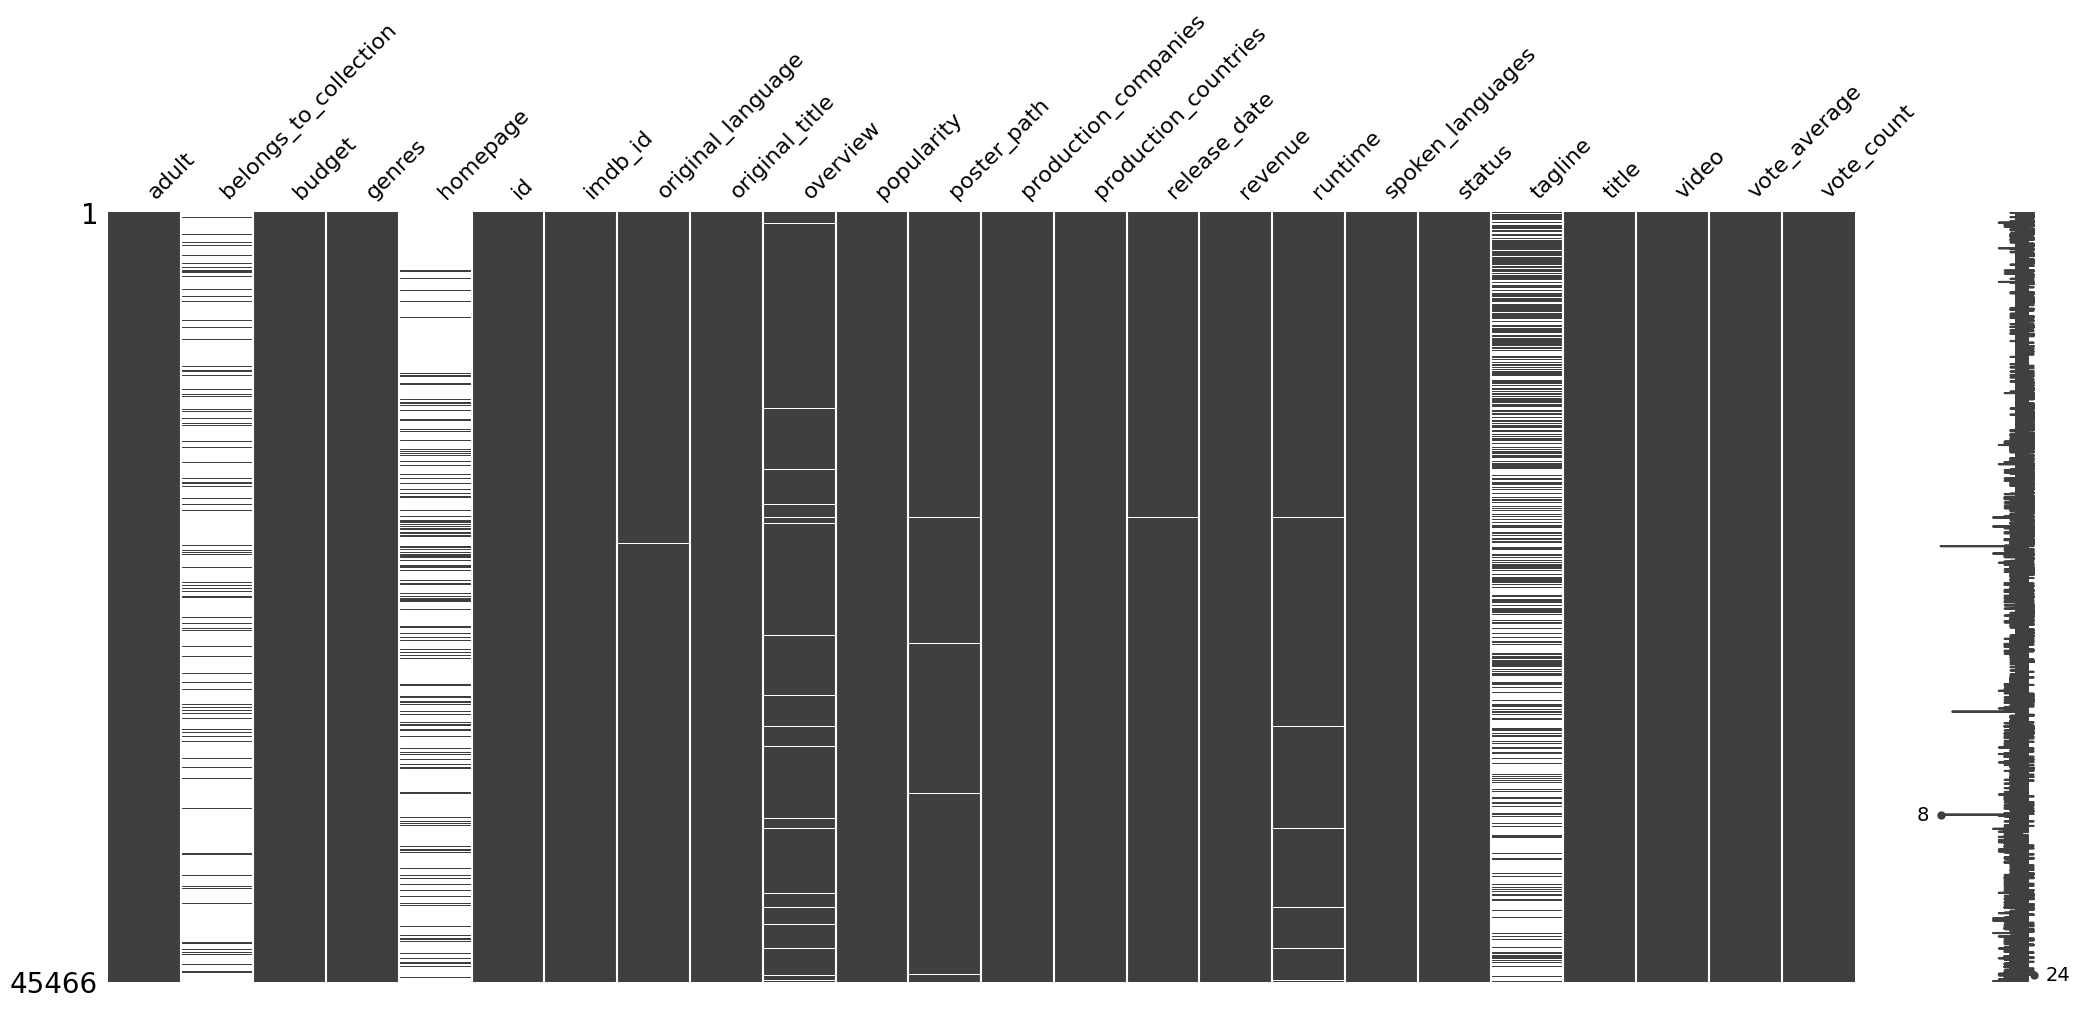

In [ ]:
#missing values
msno.matrix(df)

In [ ]:
#outlier
for i in df.select_dtypes(include = 'number').columns:
    fig = px.box(df, x = i)
    fig.update_layout(
    title = f'{i}',
    height = 300,
    width = 600
    )
    fig.update_traces(marker_color='#01008c')
    fig.show()

In [ ]:
df.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


In [ ]:
#เปลี่ยนDataเป็นDatetime
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')

In [ ]:
df = df.dropna()

In [ ]:
data_cleaned_columns = df.dropna(axis=1)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

## **Exploratory Data Analysis**

In [ ]:
#กราฟนี้มีแนวโน้มการผลิตภาพยนตร์อย่างไรในแต่ละช่วงเวลา
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
fig = px.histogram(df, x='release_year', title='Distribution of Movies by Release Year')
fig.update_traces(marker_color='#01008c')
fig.show()

In [ ]:
#คะแนนโหวตเฉลี่ยของภาพยนตร์เปลี่ยนแปลงไปตามปีที่ออกฉายหรือไม่
fig = px.scatter(df, x='release_year', y='vote_average',
                 labels={'vote_average': 'Vote Average', 'release_year': 'Release Year'},
                 title='Vote Average by Release Year')

fig.update_traces(marker=dict(color='#01008c', size=8))

fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Vote Average',
    template='plotly_white',
    xaxis=dict(tickmode='linear', tick0=1950, dtick=5),
    xaxis_tickangle=-45 )
fig.show()

In [ ]:
#แนวโน้มการออกฉายของภาพยนตร์ในแต่ละปี
movies_per_year = df['release_year'].value_counts().sort_index()
fig = px.line(movies_per_year,
              x = movies_per_year.index,
              y = movies_per_year.values,
              labels = {'x': 'Year', 'y': 'Number of Movies'},
              title = 'Movies Released Per Year')
fig.update_traces(line=dict(color='#01008c'))
fig.show()

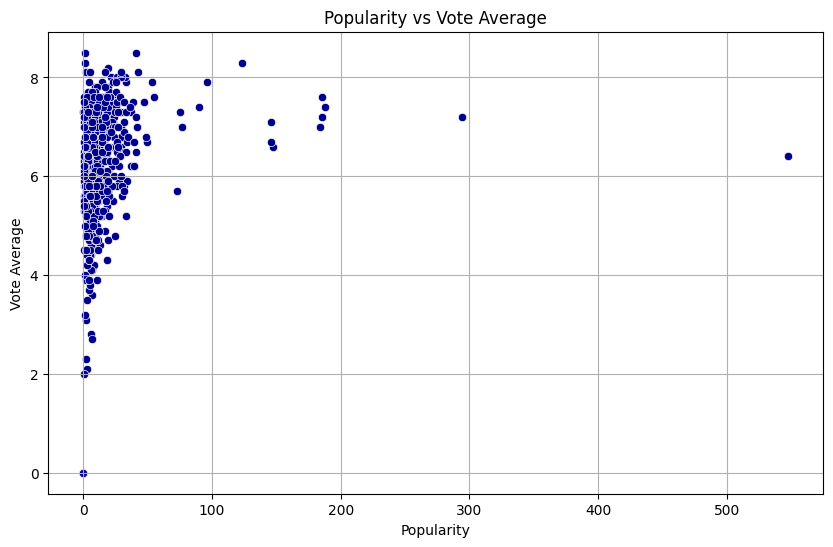

In [ ]:
#Popularity vs Vote average
#ความนิยมมีผลต่อคะแนนโหวตเฉลี่ยหรือไม่
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', data=df, color='#01008c')
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid()
plt.show()

In [ ]:
#Vote Count vs Vote average
#จำนวนการโหวต มีผลต่อ คะแนนโหวตเฉลี่ย
fig = px.scatter(df, x='vote_count', y='vote_average',
                 labels={'vote_count': 'Vote Count', 'vote_average': 'Vote Average'},
                 title='Vote Count vs Vote Average')
fig.update_traces(marker=dict(color='#01008c', size=8, opacity=0.7))
fig.update_layout(
    xaxis_title='Vote Count',
    yaxis_title='Vote Average',
    template='plotly_white'
)
fig.show()

In [ ]:
top_10_votes = df.nlargest(10, 'vote_count')
fig = px.bar(top_10_votes,
             x = 'title',
             y = 'vote_count',
             title = 'Top 10 Movies with Highest Vote Count')
fig.update_traces(marker_color='#01008c')
fig.show()

## **Summary project progress**

In [ ]:
#ชื่อโครงการ: ภาพยนตร์ที่ได้รับการจัดอันดับสูงสุด
#1. เป้าหมายของโครงการ

#ทำการวิเคราะห์เรทติ้งหนังภาพยนตร์ในแต่ล่ะช่วงเวลาซึ่งจะทำให้ ผู้ชมเลือกชมภาพยนตร์ที่สนุกและน่าสนใจได้ดียิ่งขึ้น และอุตสาหกรรมภาพยนตร์สามารถใช้ข้อมูลนี้เพื่อปรับกลยุทธ์ในการผลิตและจัดจำหน่าย
#สร้างโมเดลในการแนะนำหนังที่มีความคล้ายคลึงกับหนังที่เราเลือก

#2. ความก้าวหน้าของโครงการจนถึงปัจจุบัน

#การทำความสะอาดข้อมูล

#ทำการลบข้อมูลที่ไม่สมบูรณ์ เช่น ข้อมูลที่มีค่าที่หายไปอย่างสำคัญและข้อมูลที่ไม่ถูกต้อง
#ข้อมูลที่มีค่า outlier ได้รับการตรวจสอบและแก้ไขตามความเหมาะสม

#การวิเคราะห์ข้อมูลเชิงสำรวจ

#ได้มีการทำกราฟที่มีแนวโน้มการผลิตภาพยนตร์อย่างไรในแต่ละช่วงเวลา
#กราฟแนวโน้มการออกฉายของภาพยนตร์ในแต่ละปี
#กราฟคะแนนโหวตเฉลี่ยของภาพยนตร์เปลี่ยนแปลงไปตามปีที่ออกฉายหรือไม่
#กราฟความนิยมมีผลต่อคะแนนโหวตเฉลี่ยหรือไม่
#กราฟจำนวนการโหวต มีผลต่อ คะแนนโหวตเฉลี่ย
#กราฟ10อันดับหนังที่ได้รับการโหวตมากที่สุด

#ความสำเร็จที่ทำได้

#ได้ข้อมูลเชิงลึกเกี่ยวกับหนังยอดนิยม
#สร้างความเข้าใจเกี่ยวกับปัจจัยที่มีผลต่อหนังภาพยนตร์ เช่น แนวหนังภาพยนตร์ที่คนดูรับชมมากท่สุดและคนโหวตมากที่สุด

#Import Library packages : pandas , missingno , matplotlib.pyplot , seaborn , numpy , plotly.express , warnings , stats , literal_eval , TfidfVectorizer , CountVectorizer , linear_kernel , cosine_similarity , SnowballStemmer , WordNetLemmatizer , wordnet , warnings


## **Data pre-processing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ตัวอย่างการโหลดข้อมูล (สามารถปรับใช้กับข้อมูลของคุณ)
df = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv', low_memory=False)

# สมมุติว่าเรามีฟีเจอร์ X และ target (y) สำหรับการทำโมเดล
# เช่น X คือฟีเจอร์ทั้งหมด (เช่น genres, title) และ y คือผลลัพธ์ (เช่น rating หรือ label)

# ตัวอย่างการสร้างฟีเจอร์ X และ target y
X = df[['genres']]  # เช่น เลือกเฉพาะคอลัมน์ 'genres'
y = df['vote_average']  # หรือเลือกคอลัมน์ที่เป็น label เช่น 'vote_average'

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ (test_size กำหนดสัดส่วนของข้อมูลทดสอบ เช่น 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# แสดงข้อมูลที่แบ่งแล้ว
print(f"จำนวนข้อมูลทั้งหมด: {len(df)}")
print(f"จำนวนข้อมูลฝึก: {len(X_train)}")
print(f"จำนวนข้อมูลทดสอบ: {len(X_test)}")

# ตัวอย่างการตรวจสอบข้อมูลบางส่วน
print("ข้อมูลฝึก (X_train):")
print(X_train.head())

print("ข้อมูลทดสอบ (X_test):")
print(X_test.head())


จำนวนข้อมูลทั้งหมด: 45466
จำนวนข้อมูลฝึก: 36372
จำนวนข้อมูลทดสอบ: 9094
ข้อมูลฝึก (X_train):
                                                  genres
41712  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
25646  [{'id': 10751, 'name': 'Family'}, {'id': 35, '...
29596  [{'id': 36, 'name': 'History'}, {'id': 18, 'na...
4526   [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...
41710  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
ข้อมูลทดสอบ (X_test):
                                                  genres
43526  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...
6383   [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...
3154   [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
10146  [{'id': 27, 'name': 'Horror'}, {'id': 10749, '...
9531   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...


## **Build Machine Learning Model**

Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer

# อ่านข้อมูลจาก CSV
df = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv', low_memory=False)

# ตรวจสอบข้อมูล genres
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])
df['genre_names'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])

# แปลงข้อมูล genres เป็น One-Hot Encoding โดยใช้ MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_onehot = mlb.fit_transform(df['genre_names'])

# สร้าง DataFrame สำหรับ One-Hot Encoding
genres_df = pd.DataFrame(genres_onehot, columns=mlb.classes_)

# เติมค่า NaN ใน 'vote_average' ด้วยค่าเฉลี่ย
df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())

# เลือกคอลัมน์ที่ต้องการใช้
X = genres_df  # ฟีเจอร์ genres ที่แปลงเป็น One-Hot Encoding
y = df['vote_average']  # ค่าที่ต้องการทำนาย (vote_average)

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Linear Regression
model = LinearRegression()

# ฝึกโมเดล
model.fit(X_train, y_train)

# ทำนายผลลัพธ์
y_pred = model.predict(X_test)

# คำนวณความแม่นยำของโมเดล
mae = mean_absolute_error(y_test, y_pred)  # ค่า MAE (Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred)  # ค่า MSE (Mean Squared Error)
r2 = r2_score(y_test, y_pred)  # ค่า R^2 (Coefficient of Determination)

# แสดงผลลัพธ์
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.3024770156602783
Mean Squared Error: 3.538108123292994
R^2 Score: 0.050750605296682294


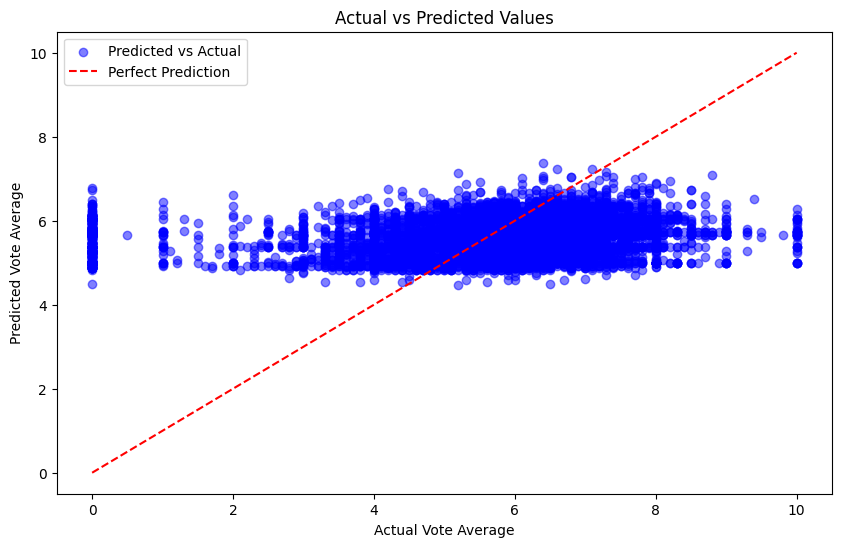

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')

# Plot a line of perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Vote Average')
plt.ylabel('Predicted Vote Average')
plt.legend()

# Show plot
plt.show()

Content-Based Filtering

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# สร้าง DataFrame ของหนัง
df = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')

df = pd.DataFrame(data)

# แสดงข้อมูลหนัง
print("DataFrame:")
print(df)

# สร้าง CountVectorizer เพื่อแปลง Genres เป็น Vector
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_vectors = vectorizer.fit_transform(df['Genres'])

# คำนวณความคล้ายคลึงแบบ Cosine Similarity
cosine_sim = cosine_similarity(genre_vectors, genre_vectors)

# ฟังก์ชันแนะนำหนัง
def recommend_movies(title, cosine_sim=cosine_sim):
    # หา index ของหนังที่เลือก
    idx = df[df['Title'] == title].index[0]

    # หาอันดับความคล้ายคลึง
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # ดึง index ของหนังที่คล้ายที่สุด (ยกเว้นตัวเอง)
    movie_indices = [i[0] for i in similarity_scores[1:4]]  # แนะนำ 3 เรื่อง

    return df['Title'].iloc[movie_indices]

# ตัวอย่างการใช้งาน
movie_to_recommend = "Inception"
recommended_movies = recommend_movies(movie_to_recommend)

print(f"\nMovies recommended for '{movie_to_recommend}':")
print(recommended_movies.to_string(index=False))


DataFrame:
          Title                     Genres
0     Inception  Sci-Fi, Action, Adventure
1  Interstellar   Sci-Fi, Drama, Adventure
2    The Matrix   Sci-Fi, Action, Thriller
3   The Martian   Sci-Fi, Adventure, Drama
4       Gravity    Sci-Fi, Drama, Thriller

Movies recommended for 'Inception':
Interstellar
  The Matrix
 The Martian


Unsupervised Clustering


Clustered Data by Genres:
                         title  Cluster
0                    Toy Story        0
1                      Jumanji        0
2             Grumpier Old Men        2
3            Waiting to Exhale        2
4  Father of the Bride Part II        2


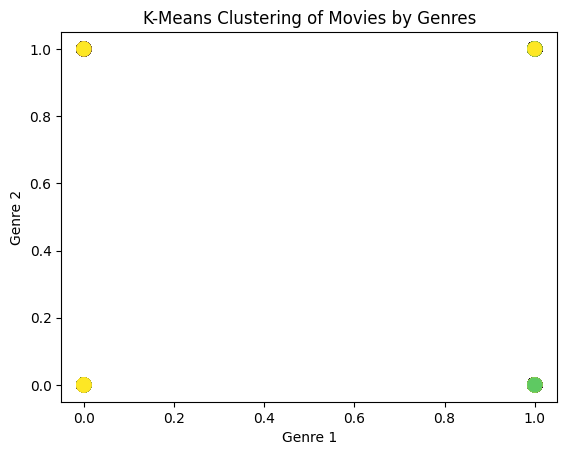

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

# อ่านข้อมูลจาก CSV
df = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')

# ตรวจสอบข้อมูล genres
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])
df['genre_names'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])

# แปลงข้อมูล genres เป็น One-Hot Encoding โดยใช้ MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_onehot = mlb.fit_transform(df['genre_names'])

# สร้าง DataFrame สำหรับ One-Hot Encoding
genres_df = pd.DataFrame(genres_onehot, columns=mlb.classes_)

# การใช้ KMeans ในการจัดกลุ่มตาม genres
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(genres_df)

# เพิ่มคอลัมน์ Cluster ลงใน DataFrame
df['Cluster'] = kmeans.labels_

# แสดงข้อมูลที่จัดกลุ่มแล้ว
print("\nClustered Data by Genres:")
print(df[['title', 'Cluster']].head())

# แสดงกราฟ 2D ของ Cluster โดยใช้ 2 คอลัมน์แรกจาก genres_onehot
plt.scatter(genres_df.iloc[:, 0], genres_df.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title("K-Means Clustering of Movies by Genres")
plt.xlabel("Genre 1")
plt.ylabel("Genre 2")
plt.show()

Evaluate Model

In [ ]:
import pandas as pd
import json

# อ่านข้อมูลจาก CSV
df = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv', low_memory=False)

# ฟังก์ชันเพื่อแปลงข้อมูล genres จาก JSON เป็น list ของประเภทหนัง
def parse_genres(genres_str):
    try:
        genres = json.loads(genres_str)
        return [genre['name'] for genre in genres]  # ดึงชื่อประเภท
    except (ValueError, TypeError):
        return []

# แปลง genres ทั้งหมดใน DataFrame
df['genres'] = df['genres'].apply(parse_genres)

# ฟังก์ชันกรองแถวที่ genres เป็นค่าว่างหรือไม่เป็น list
def filter_genres(row):
    return isinstance(row, list) and len(row) > 0

# ฟังก์ชันเพื่อคำนวณ Jaccard similarity ระหว่าง genres ของหนัง
def jaccard_similarity(genres1, genres2):
    # คำนวณ Jaccard similarity: ข้อเสนอที่ทั้งสองชุดมีการแบ่งปัน
    intersection = len(set(genres1).intersection(set(genres2)))
    union = len(set(genres1).union(set(genres2)))
    return intersection / union if union != 0 else 0

# ฟังก์ชันแนะนำหนังที่คล้ายกับหนังที่เลือกจาก `genres` พร้อมคะแนนโหวต
def get_recommendations_genres(title):
    idx = df[df['title'] == title].index
    if len(idx) == 0:
        return f"'{title}' not found in the dataset."

    idx = idx[0]  # ใช้ดัชนีแรก
    target_genres = df.iloc[idx]['genres']
    target_vote = df.iloc[idx]['vote_average']  # ใช้คะแนนโหวตของหนังที่เลือก

    # คำนวณความคล้ายคลึงกับหนังทุกเรื่องใน dataset โดยใช้ Jaccard similarity
    sim_scores = []
    for i, row in df.iterrows():
        if i != idx:
            sim_score = jaccard_similarity(target_genres, row['genres'])
            # รวมคะแนนโหวตเพื่อเพิ่มน้ำหนัก
            weighted_score = sim_score * row['vote_average']
            sim_scores.append((i, weighted_score))

    # เรียงลำดับความคล้ายคลึงจากมากไปหาน้อย
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # เลือกแค่ 10 หนังที่คล้ายที่สุด (ข้ามตัวเองไป)
    sim_scores = sim_scores[:10]

    # ดึงชื่อหนังที่คล้ายกัน
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# ทดสอบการแนะนำ
recommended_movies = get_recommendations_genres('Deadpool')
print(recommended_movies)

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
5                           Heat
6                        Sabrina
7                   Tom and Huck
8                   Sudden Death
9                      GoldenEye
Name: title, dtype: object


## **Summary**

In [ ]:
#1.สรุปการทำงานของโมเดล
#Linear Regression
#ค่าที่ได้แสดงว่าโมเดล Linear Regression ที่ใช้ genres เป็นฟีเจอร์เพื่อทำนาย vote_average ยังไม่สามารถทำนายได้แม่นยำมากนัก:
#MAE และ MSE ค่อนข้างสูง แสดงถึงความผิดพลาดในการทำนาย
#R² ที่ต่ำ (0.05) แสดงว่าโมเดลสามารถอธิบายข้อมูลได้เพียงแค่ 5% ซึ่งค่อนข้างต่ำ.
#Unsupervised Clustering จัดกลุ่มภาพยนตร์ตามประเภท (genres) โมเดลจะหากลุ่มที่มีลักษณะคล้ายกันตามประเภทของภาพยนตร์
#Content-Based Filtering เมื่อผู้ใช้ป้อนชื่อภาพยนตร์ เช่น "Inception" ระบบจะคำนวณ Cosine Similarity ระหว่างประเภทของภาพยนตร์ทั้งหมดในฐานข้อมูล แล้วแนะนำ 3 ภาพยนตร์ที่มีความคล้ายคลึงสูงที่สุดตามประเภทภาพยนตร์เอง
#2.สรุปถึงการแก้ปัญหาที่ได้ตั้งไว้
#โมเดลได้ช่วยแนะนำประเภทหนังที่ตรงกับรสนิยมที่เราชอบดูหรือที่เราเลือกมาซึ่งจะช่วยให้ผู้ชมเข้าถึงและเลือกชมภาพยนตร์ที่สอดคล้องกับรสนิยมได้อย่างสะดวกและรวดเร็วมากขึ้นและอุตสาหกรรมภาพยนตร์สามารถใช้ข้อมูลนี้เพื่อปรับกลยุทธ์ในการผลิตและจัดจำหน่ายตามคะแนนโหวตของผู้ชม
